In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data wrangling 

In [3]:
# column renaming 
crime1 = crime.rename({'Unnamed: 0': 'countries'}, axis=1)
crime1.head(2)

,countries,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [4]:
# data type conversion 
crime1['Assault']=crime1['Assault'].astype(float)
crime1['UrbanPop']=crime1['UrbanPop'].astype(float)
crime1.head(5)

,countries,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236.0,58.0,21.2
1,Alaska,10.0,263.0,48.0,44.5
2,Arizona,8.1,294.0,80.0,31.0
3,Arkansas,8.8,190.0,50.0,19.5
4,California,9.0,276.0,91.0,40.6


## Hclustering ##

In [5]:
# standardizing the data 
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
crime_data = pd.DataFrame(trans.fit_transform(crime1.iloc[:,1:]))
crime_data.head(10)

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


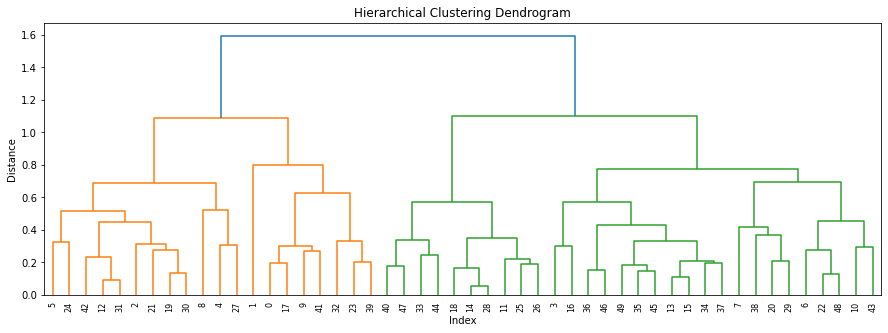

In [6]:
# Hclustering with complete linkages 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch  
z = linkage(crime_data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(crime_data) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime1['clust']=cluster_labels
crime1

,countries,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236.0,58.0,21.2,3
1,Alaska,10.0,263.0,48.0,44.5,4
2,Arizona,8.1,294.0,80.0,31.0,1
3,Arkansas,8.8,190.0,50.0,19.5,0
4,California,9.0,276.0,91.0,40.6,1
5,Colorado,7.9,204.0,78.0,38.7,1
6,Connecticut,3.3,110.0,77.0,11.1,0
7,Delaware,5.9,238.0,72.0,15.8,0
8,Florida,15.4,335.0,80.0,31.9,1
9,Georgia,17.4,211.0,60.0,25.8,3


In [8]:
crime1.iloc[:,1:].groupby(crime1.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.715000,132.300000,70.800000,18.100000,0
1,10.883333,256.916667,78.333333,32.250000,1
2,3.180000,78.700000,49.300000,11.630000,2
3,14.671429,251.285714,54.285714,21.685714,3
4,10.000000,263.000000,48.000000,44.500000,4


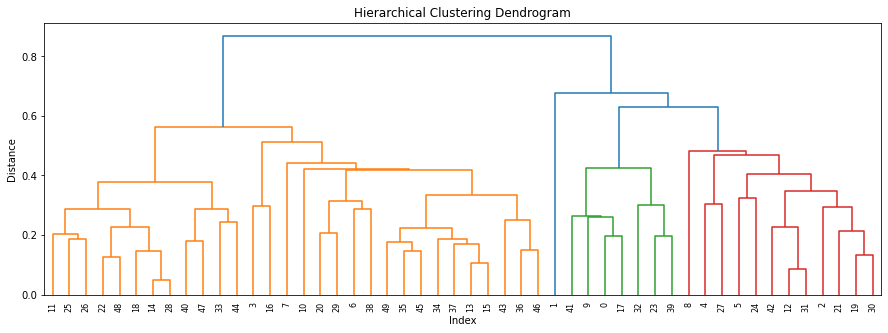

In [9]:
# Hclustering with average linkages 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch  
z = linkage(crime_data, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(crime_data) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime1['clust_avg']=cluster_labels
crime1

,countries,Murder,Assault,UrbanPop,Rape,clust,clust_avg
0,Alabama,13.2,236.0,58.0,21.2,3,3
1,Alaska,10.0,263.0,48.0,44.5,2,2
2,Arizona,8.1,294.0,80.0,31.0,1,1
3,Arkansas,8.8,190.0,50.0,19.5,0,0
4,California,9.0,276.0,91.0,40.6,1,1
5,Colorado,7.9,204.0,78.0,38.7,1,1
6,Connecticut,3.3,110.0,77.0,11.1,0,0
7,Delaware,5.9,238.0,72.0,15.8,0,0
8,Florida,15.4,335.0,80.0,31.9,1,1
9,Georgia,17.4,211.0,60.0,25.8,3,3


In [ ]:
# In both the methods the specific observation falls under the same clusters. 
# We have only 50 observations so we can't apply the k-means clustering. 